### **Install Dependencies**

In [ ]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 40.2 MB/s eta 0:00:00


In [1]:
import os
import json

# Directory paths
IMAGES_DIR = "/content/Images"
JSON_DIR = "/content/Json_files"

# Function to load JSON data
def load_json_data(json_dir):
    json_data = {}
    for filename in os.listdir(json_dir):
        if filename.endswith('.json'):
            with open(os.path.join(json_dir, filename), "r") as f:
                data = json.load(f)
                json_data[filename] = data
    return json_data

# Load JSON data
json_data = load_json_data(JSON_DIR)


In [2]:
import os
import json
import re

# Define the directory paths
JSON_DIR = "/content/Json_files"

# Function to clean captions
def clean_caption(caption):
    # Remove punctuation
    caption = re.sub(r'[^\w\s]', '', caption)
    # Remove single characters
    caption = re.sub(r'\b\w\b', '', caption)
    # Remove numeric values
    caption = re.sub(r'\b\d+\b', '', caption)
    # Convert to lowercase
    caption = caption.lower()
    return caption

# Load JSON data
def load_json_data(directory):
    json_data = {}
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            with open(os.path.join(directory, filename), 'r') as file:
                data = json.load(file)
                json_data[filename] = data
    return json_data

# Load JSON data
json_data = load_json_data(JSON_DIR)

# Function to convert figures into images
def convert_to_images(json_data):
    for filename, data in json_data.items():
        image_filename = data.get('figure-ID')
        image_path = os.path.join(IMAGES_DIR, image_filename)
        if os.path.exists(image_path):
            # Open and resize the image
            img = Image.open(image_path)
            img = img.resize((224, 224))  # Adjust the size as needed
            # Save the image with a consistent filename
            img.save(os.path.join(IMAGES_DIR, f"{filename}.png"))  # Change the extension if needed

# Clean captions
for filename, data in json_data.items():
    caption = data.get('1-lowercase-and-token-and-remove-figure-index', {}).get('caption', '')
    cleaned_caption = clean_caption(caption)
    data['cleaned_caption'] = cleaned_caption

# Save the cleaned captions back to JSON files
for filename, data in json_data.items():
    with open(os.path.join(JSON_DIR, filename), 'w') as file:
        json.dump(data, file, indent=4)


In [3]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (only need to do this once)
nltk.download('punkt')

# Function to tokenize captions
def tokenize_caption(caption):
    tokens = word_tokenize(caption)
    return tokens

# Tokenize captions
for filename, data in json_data.items():
    cleaned_caption = data.get('cleaned_caption', '')
    tokens = tokenize_caption(cleaned_caption)
    data['tokens'] = tokens

# Save the tokenized captions back to JSON files
for filename, data in json_data.items():
    with open(os.path.join(JSON_DIR, filename), 'w') as file:
        json.dump(data, file, indent=4)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

# Define the directory containing the images
image_dir = '/content/Images'

# Define the transformation to be applied to the images
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to 224x224
    transforms.ToTensor(),           # Convert the images to PyTorch tensors
    transforms.Normalize(            # Normalize the images
        mean=[0.485, 0.456, 0.406],   # Mean values for normalization
        std=[0.229, 0.224, 0.225]      # Standard deviation values for normalization
    )
])

# Load the pre-trained VGG16 model
vgg16_model = models.vgg16(pretrained=True)
# Remove the last fully connected layer to get feature extraction
vgg16_model = torch.nn.Sequential(*list(vgg16_model.children())[:-1])
# Set the model to evaluation mode
vgg16_model.eval()

# Function to extract features from images
def extract_vgg16_features(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image = image_transform(image)
    image = image.unsqueeze(0)  # Add batch dimension

    # Extract features using the VGG16 model
    with torch.no_grad():
        features = vgg16_model(image)
    return features.squeeze().numpy()  # Convert to NumPy array and remove the batch dimension

# Extract features from each image in the directory
image_features = {}
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        features = extract_vgg16_features(image_path)
        image_features[filename] = features

# Now image_features contains the extracted features for each image


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:11<00:00, 46.4MB/s]


In [6]:
import os
import json
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Define a function to preprocess the caption
def preprocess_caption(caption):
    return caption.strip()

# Define the directory containing your JSON files
json_directory = '/content/Json_files'

# Load JSON data for each image
image_data = []
for filename in os.listdir(json_directory):
    if filename.endswith('.json'):
        json_file = os.path.join(json_directory, filename)
        with open(json_file, 'r') as f:
            data = json.load(f)
            caption = preprocess_caption(data['2-normalized']['2-1-basic-num']['caption'])
            image_path = os.path.join('/content/Images', data['figure-ID'])
            image_data.append({'caption': caption, 'image_path': image_path})

# Define transformations for the image
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load pre-trained ResNet model for feature extraction
vision_model = resnet50(pretrained=True)
vision_model.eval()  # Set the model to evaluation mode

# Process each image and its corresponding caption
for data in image_data:
    caption = data['caption']
    image_path = data['image_path']
    image = Image.open(image_path).convert('RGB')
    image = image_transform(image)
    image = image.unsqueeze(0)  # Add batch dimension

    # Extract image features
    with torch.no_grad():
        features = vision_model(image)

    print("Image Features Extracted Successfully for:", image_path)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 72.0MB/s]


Image Features Extracted Successfully for: /content/Images/2011.09280v1-Figure5-1.png
Image Features Extracted Successfully for: /content/Images/2011.09799v1-Figure2-1.png
Image Features Extracted Successfully for: /content/Images/2011.09724v1-Figure5-1.png
Image Features Extracted Successfully for: /content/Images/2011.09336v1-Figure4.3-1.png
Image Features Extracted Successfully for: /content/Images/2011.07673v1-Figure7-1.png
Image Features Extracted Successfully for: /content/Images/2011.07835v1-Figure2-1.png
Image Features Extracted Successfully for: /content/Images/2011.09752v1-Figure2-1.png
Image Features Extracted Successfully for: /content/Images/2011.07831v1-Figure7-1.png
Image Features Extracted Successfully for: /content/Images/2011.09789v1-Figure6-1.png
Image Features Extracted Successfully for: /content/Images/2011.09789v1-Figure10-1.png
Image Features Extracted Successfully for: /content/Images/2011.09970v1-Figure3-1.png
Image Features Extracted Successfully for: /content

In [7]:
import json
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

# Download NLTK resources (only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')

# Define the directory containing your JSON caption files
json_directory = "/content/Json_files"

# Preprocess and tokenize the captions
def preprocess_captions_from_json(json_directory):
    cleaned_captions = []
    english_stopwords = set(stopwords.words('english'))
    english_punctuation = set(punctuation)
    for filename in os.listdir(json_directory):
        if filename.endswith(".json"):
            with open(os.path.join(json_directory, filename), "r") as f:
                data = json.load(f)
                caption = data.get("2-normalized", {}).get("2-1-basic-num", {}).get("caption", "")
                caption = caption.lower()
                tokens = word_tokenize(caption)
                tokens = [token for token in tokens if token not in english_stopwords and token not in english_punctuation]
                cleaned_captions.append(tokens)
    return cleaned_captions

# Example usage:
cleaned_captions = preprocess_captions_from_json(json_directory)
print(cleaned_captions)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[['evolution', 'number', 'sequences', 'num-tk', 'subsets', 'training', 'validation', 'test', 'different', 'configurations', 'num-tk', 'num-tk', 'fps', 'sequence', 'length', 'num-tk', 'num-tk', 'num-tk', 'frames', 'overlapping', 'ratio', 'num-tk', 'num-tk', 'num-tk'], ['random', 'coding', 'error', 'exponents', 'bsc', 'optimal', 'decoding'], ['average', 'ee-se', 'tradeoffs', 'different', 'weighting', 'factors', 'cps', 'case', 'different', 'transmit', 'power', 'budgets'], ['evolution', 'temperature', 'obtained', 'applying', 'cg', 'scheme', '𝑟', 'num-tk', 'quasilinear', 'heat', 'equation', 'example', 'section', 'num-tk', '𝑐1', 'num-tk', '𝑐2', 'num-tk', 'line', 'indicates', 'num-tk', 'point', 'time', '𝑡', 'num-tk', '𝑘', 'num-tk', 'num-tk', 'orange', 'purple'], ['distribution', 'surge', 'multiplier', 'time-of-day'], ['error', 'probability', 'comparison', 'actual', 'attack', 'varied', 'designed', 'adversarial', 'budget', 'fixed', 'ǫdes', 'num-tk', 'also', 'shown', 'error', 'probability', 'app

In [8]:
import json

# Load your JSON data
with open("/content/Json_files/2011.07673v1-Figure2-1.json", "r") as f:
    json_data = json.load(f)

# Extract the caption
caption = json_data["2-normalized"]["2-1-basic-num"]["caption"]
print(caption)


demand distribution of ride-sourcing by time-of-day .


In [9]:
import json

# Load your JSON data
with open("/content/Json_files/2011.07673v1-Figure7-1.json", "r") as f:
    json_data = json.load(f)

# Extract the caption
caption = json_data["2-normalized"]["2-1-basic-num"]["caption"]
print(caption)


distribution of surge multiplier by time-of-day .


In [10]:
import json

# Load your JSON data
with open("/content/Json_files/2011.07693v1-Figure6-1.json", "r") as f:
    json_data = json.load(f)

# Extract the caption
caption = json_data["2-normalized"]["2-1-basic-num"]["caption"]
print(caption)


fuzzy set generated from NUM-TK intervals .


In [18]:
from gensim.models import Word2Vec

# Train word embeddings using the cleaned captions
word_embeddings_model = Word2Vec(cleaned_captions, vector_size=100, window=5, min_count=1, workers=4)

# Get the vocabulary size and embedding dimension
vocab_size = len(word_embeddings_model.wv.key_to_index)
embedding_dim = word_embeddings_model.wv.vector_size

# Function to convert tokens to embeddings
def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens:
        if token in word_embeddings_model.wv:
            embeddings.append(word_embeddings_model.wv[token])
        else:
            # If the token is not in the vocabulary, use zero vector
            embeddings.append([0] * embedding_dim)
    return embeddings

# Convert cleaned captions to embeddings
caption_embeddings = [tokens_to_embeddings(tokens) for tokens in cleaned_captions]

# Example usage:
print("Number of captions:", len(caption_embeddings))
print("Number of tokens in first caption:", len(caption_embeddings[0]))
print("Embedding dimension:", len(caption_embeddings[0][0]))


Number of captions: 201
Number of tokens in first caption: 24
Embedding dimension: 100


In [11]:
import os
import json
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset
from transformers import AutoTokenizer

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_data, tokenizer, image_transform):
        self.image_data = image_data
        self.tokenizer = tokenizer
        self.image_transform = image_transform

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, idx):
        item = self.image_data[idx]
        image_path = item['image_path']
        caption = item['caption']

        # Load and transform the image
        image = Image.open(image_path).convert('RGB')
        image = self.image_transform(image)

        # Tokenize the caption
        caption_tokens = self.tokenizer.encode(caption)

        return image, torch.tensor(caption_tokens)

# Define the directory containing your JSON files and image directory
json_directory = '/content/Json_files'
image_directory = '/content/Images'

# Load JSON data for each image
image_data = []
for filename in os.listdir(json_directory):
    if filename.endswith('.json'):
        json_file = os.path.join(json_directory, filename)
        with open(json_file, 'r') as f:
            data = json.load(f)
            caption = preprocess_caption(data['2-normalized']['2-1-basic-num']['caption'])
            image_path = os.path.join(image_directory, data['figure-ID'])
            image_data.append({'caption': caption, 'image_path': image_path})

# Define transformations for the image
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Initialize the custom dataset
custom_dataset = CustomDataset(image_data, tokenizer, image_transform)

# Define the data loader
batch_size = 4  # Adjust batch size as needed
train_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence

# Define your model architecture
class ImageCaptioningModel(nn.Module):
    def __init__(self, vision_model, language_model, vocab_size, embedding_dim, hidden_dim):
        super(ImageCaptioningModel, self).__init__()
        self.vision_model = vision_model
        self.language_model = language_model
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, images, captions, lengths):
        # Extract image features
        image_features = self.vision_model(images)

        # Initialize hidden state for LSTM
        batch_size = captions.size(0)
        hidden = self.init_hidden(batch_size)

        # Embed captions
        embedded_captions = self.embedding(captions)

        # Concatenate image features with embedded captions
        combined_features = torch.cat((image_features.unsqueeze(1), embedded_captions), dim=1)

        # Pack padded sequence
        packed = pack_padded_sequence(combined_features, lengths, batch_first=True, enforce_sorted=False)

        # Forward pass through LSTM
        outputs, _ = self.rnn(packed, hidden)

        # Unpack padded sequence
        outputs, _ = pad_packed_sequence(outputs, batch_first=True)

        # Pass through fully connected layer
        outputs = self.fc(outputs)

        return outputs

    def init_hidden(self, batch_size):
        return (torch.zeros(1, batch_size, self.hidden_dim),
                torch.zeros(1, batch_size, self.hidden_dim))

# Define the loss function
criterion = nn.CrossEntropyLoss()




In [14]:
import torch
import torch.nn as nn
import torchvision.models as models
from transformers import AutoModel

class ImageCaptioningModel(nn.Module):
    def __init__(self, vision_model, language_model, vocab_size, embedding_dim):
        super(ImageCaptioningModel, self).__init__()
        self.vision_model = vision_model
        self.language_model = language_model
        self.fc = nn.Linear(embedding_dim, vocab_size)

    def forward(self, images, captions):
        # Extract image features
        image_features = self.vision_model(images)
        # Generate text features
        text_features = self.language_model(captions)
        # Combine image and text features
        combined_features = torch.cat((image_features, text_features), dim=1)
        # Pass through fully connected layer
        output = self.fc(combined_features)
        return output

# Define the vision model (e.g., VGG16)
vision_model = models.vgg16(pretrained=True)

# Define the language model (e.g., BERT)
language_model = AutoModel.from_pretrained("bert-base-uncased")

# Define the size of the vocabulary and embedding dimension
vocab_size = 10000
embedding_dim = 768  # Adjust based on the output size of the language model

# Initialize the ImageCaptioningModel
model = ImageCaptioningModel(vision_model, language_model, vocab_size, embedding_dim)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [15]:
class CustomDataset(Dataset):
    def __init__(self, image_data, tokenizer, image_transform):
        self.image_data = image_data
        self.tokenizer = tokenizer
        self.image_transform = image_transform

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, idx):
        item = self.image_data[idx]
        image_path = item['image_path']
        caption = item['caption']

        # Load and transform the image
        image = Image.open(image_path).convert('RGB')
        image = self.image_transform(image)

        # Tokenize the caption
        caption_tokens = self.tokenizer.encode(caption)

        # Convert caption tokens to tensor
        caption_tensor = torch.tensor(caption_tokens)

        return image, caption_tensor


In [16]:
def collate_fn(batch):
    images, captions = zip(*batch)
    images = torch.stack(images, dim=0)
    captions = pad_sequence(captions, batch_first=True)
    return images, captions


In [20]:
train_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)


In [21]:
import torch
import torch.nn as nn
import torchvision.models as models
from transformers import ViTModel

class ImageCaptioningModel(nn.Module):
    def __init__(self, num_classes, embedding_dim):
        super(ImageCaptioningModel, self).__init__()

        # Vision Transformer for image feature extraction
        self.vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.image_feature_extractor = nn.Linear(self.vit_model.config.hidden_size, embedding_dim)

        # Text embedding layer
        self.embedding = nn.Embedding(num_classes, embedding_dim)

        # Self-attention mechanism
        self.self_attention = nn.MultiheadAttention(embed_dim=embedding_dim, num_heads=8)

        # Dense layer for fusion
        self.dense = nn.Linear(embedding_dim * 2, num_classes)  # Concatenating image and text embeddings

    def forward(self, images, captions):
        # Extract image features using Vision Transformer
        image_features = self.vit_model(images).last_hidden_state
        image_features = self.image_feature_extractor(image_features)

        # Embed captions
        text_embeddings = self.embedding(captions)

        # Apply self-attention mechanism to text embeddings
        text_embeddings, _ = self.self_attention(text_embeddings, text_embeddings, text_embeddings)

        # Concatenate image features and text embeddings
        combined_features = torch.cat((image_features.unsqueeze(1), text_embeddings.unsqueeze(1)), dim=1)
        combined_features = combined_features.mean(dim=1)  # Average pooling

        # Pass through dense layer for fusion
        output = self.dense(combined_features)
        return output


In [29]:
import requests  # Library for making HTTP requests
import torch  # PyTorch for deep learning
from PIL import Image  # Library for image processing
from transformers import *  # Transformers library for NLP tasks
from tqdm import tqdm  # Library for displaying progress bars
import numpy as np # Library for numerical manipulation

device = "cuda" if torch.cuda.is_available() else "cpu"

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [30]:

encoder_model = "microsoft/swin-base-patch4-window7-224-in22k"

decoder_model = "gpt2"

## Load the pre-trained Encoder and Decoder models
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    encoder_model, decoder_model
).to(device)

config.json:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
    "rose_window, rosette": 9916,
    "roseate_spoonbill, Ajaia_ajaja": 1912,
    "rosebay, Rhododendron_maxima": 19033,
    "rosebud": 17526,
    "rosebud_cherry, winter_flowering_cherry, Prunus_subhirtella": 20120,
    "rosebud_orchid, Cleistes_rosea, Pogonia_rosea": 18520,
    "rosefish, ocean_perch, Sebastodes_marinus": 4079,
    "roselle, rozelle, sorrel, red_sorrel, Jamaica_sorrel, Hibiscus_sabdariffa": 18887,
    "rosemary": 13339,
    "rosemary, Rosmarinus_officinalis": 20711,
    "rosewood, rosewood_tree": 19778,
    "rosilla, Helenium_puberulum": 18324,
    "rosin_bag": 9917,
    "rosinweed, Silphium_laciniatum": 18422,
    "rosita, Centaurium_calycosum": 19186,
    "rosy_boa, Lichanura_trivirgata": 1199,
    "rotary_actuator, positioner": 9918,
    "rotary_engine": 9919,
    "rotary_press": 9920,
    "rotating_mechanism": 9921,
    "rotating_shaft, shaft": 9922,
    "rotavirus": 258,
    "rotgut": 13998,
    "rotifer": 1728,

model.safetensors:   0%|          | 0.00/437M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--microsoft--swin-base-patch4-window7-224-in22k/snapshots/68dc76680a5bf3bdf670669f3025dc9be2e30781/model.safetensors
Some weights of the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of SwinModel were initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k.
If your task is similar to the task the model of the

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_vers

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/model.safetensors
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256
}

All model checkpoint weights were used when initializing GPT2LMHeadModel.

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.crossattention.c_attn.bias', 'h.0.crossattention.c_attn.weight', 'h.0.crossattention.c_proj.bias', 'h.0.crossattention.c_proj.weight', 'h.0.crossattention.q_attn.bias', 'h.0.crossattention.q_attn.weight', 'h.0.ln_cross_attn.bias', 'h.0.ln_cross_attn.weight', 'h.1.crossattention.c_attn.bias', 'h.1.crossattention.c_attn.weight', 'h.1.crossattention.c_proj.bias', 'h.1.crossattention.c_proj.weight', 'h.1.crossattention.q_attn.bias', 'h.1.crossattention.q_attn.weight', 'h.1.ln_cross_attn.bias', 'h.1.ln_cross_attn.weight', 'h.10.crossattention.c_attn.bia

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

loading configuration file generation_config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/generation_config.json
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256
}

Setting `config.is_decoder=True` and `config.add_cross_attention=True` for decoder_config
Generate config GenerationConfig {}



In [31]:
from transformers import GPT2TokenizerFast
tokenizer = GPT2TokenizerFast.from_pretrained(decoder_model)
image_processor = ViTImageProcessor.from_pretrained(encoder_model)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--microsoft--swin-base-patch4-window7-224-in22k/snapshots/68dc76680a5bf3bdf670669f3025dc9be2e30781/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}, {'longest_edge'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.003921568627450

In [ ]:

# Define the loss function
criterion = nn.CrossEntropyLoss()

num_epochs=100
learning_rate=5e-5

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



def train_model(model, train_loader, criterion, optimizer, num_epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for images, captions in train_loader:
            images = images.to(device)
            captions = captions.to(device)

            optimizer.zero_grad()
            outputs = model(images, captions)

            loss = criterion(outputs, captions)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.f}")


# Save the fine-tuned model
model.save_pretrained("/content/drive/MyDrive/Model/vt.pth")


Epoch 1/100, Loss: 0.5990524780611659
Epoch 2/100, Loss: 0.3496653149987376
Epoch 3/100, Loss: 0.2895550540713377
Epoch 4/100, Loss: 0.2541965055604314
Epoch 5/100, Loss: 0.2262523018343504
Epoch 6/100, Loss: 0.20606824183879896
Epoch 7/100, Loss: 0.22305577560219653
Epoch 8/100, Loss: 0.19355169111906095
Epoch 9/100, Loss: 0.15657362636438635
Epoch 10/100, Loss: 0.13795592185369757
Epoch 11/100, Loss: 0.12227596619794535
Epoch 12/100, Loss: 0.11004367054894913
Epoch 13/100, Loss: 0.1012309268116951
Epoch 14/100, Loss: 0.0890750071510326
Epoch 15/100, Loss: 0.07977515606339587
Epoch 16/100, Loss: 0.0748008579708809
Epoch 17/100, Loss: 0.06452052979621777
Epoch 18/100, Loss: 0.058211231907439785
Epoch 19/100, Loss: 0.05291073084917179
Epoch 20/100, Loss: 0.04794657390651315
Epoch 21/100, Loss: 0.043143967253177665
Epoch 22/100, Loss: 0.03963507144430349
Epoch 23/100, Loss: 0.03573067053112873
Epoch 24/100, Loss: 0.032933546186879624
Epoch 25/100, Loss: 0.031218532039675603
Epoch 26/100,

In [ ]:
torch.save(model, '/content/drive/MyDrive/Model/vt.pth')

In [ ]:
model_names = torch.load('/content/drive/MyDrive/Model/vt.pth', map_location=torch.device('cpu'))

Generated Caption:  distribution of surge multiplier by time-of-day .


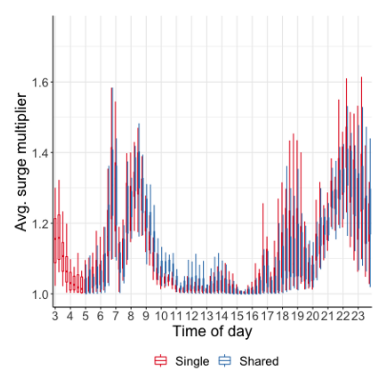

In [37]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from transformers import AutoTokenizer, AutoModelForImageCaptioning

# Load the fine-tuned vision encoder-decoder model
model_name = "/content/drive/MyDrive/Model/vt.pth"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForImageCaptioning.from_pretrained(model_name)

# Define image preprocessing pipeline
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load and preprocess the image
image_path = "/content/Images/2011.07673v1-Figure7-1.png"
image = Image.open(image_path).convert("RGB")
image = image_transform(image)
image = image.unsqueeze(0)  # Add batch dimension

# Generate caption
output = model.generate(image)
generated_caption = tokenizer.decode(output[0], skip_special_tokens=True)

# Visualize the image and generated caption
plt.imshow(image.squeeze(0).permute(1, 2, 0))
plt.axis("off")
plt.title("Generated Caption: " + generated_caption)
plt.show()

Generated Caption:  the figure depicts the average reward per episode for the experiment to evaluate the scalability . we have added NUM-TK more parameters to the search space to see whether the learning time has a significant change . it is evident from the figure that achieving the highest reward did not take a substantial number of episodes .


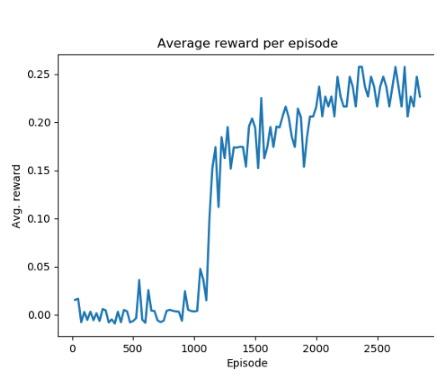

In [38]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from transformers import AutoTokenizer, AutoModelForImageCaptioning

# Load the fine-tuned vision encoder-decoder model
model_name = "/content/drive/MyDrive/Model/vt.pth"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForImageCaptioning.from_pretrained(model_name)

# Define image preprocessing pipeline
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load and preprocess the image
image_path = "/content/Images/2011.07699v1-Figure15-1.png"
image = Image.open(image_path).convert("RGB")
image = image_transform(image)
image = image.unsqueeze(0)  # Add batch dimension

# Generate caption
output = model.generate(image)
generated_caption = tokenizer.decode(output[0], skip_special_tokens=True)

# Visualize the image and generated caption
plt.imshow(image.squeeze(0).permute(1, 2, 0))
plt.axis("off")
plt.title("Generated Caption: " + generated_caption)
plt.show()

Generated Caption:  normalized acc and ec with a = .5 versus average snr .


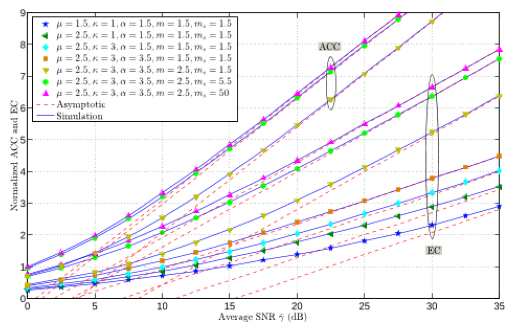

In [39]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from transformers import AutoTokenizer, AutoModelForImageCaptioning

# Load the fine-tuned vision encoder-decoder model
model_name = "/content/drive/MyDrive/Model/vt.pth"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForImageCaptioning.from_pretrained(model_name)

# Define image preprocessing pipeline
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load and preprocess the image
image_path = "/content/Images/2011.07760v1-Figure3-1.png"
image = Image.open(image_path).convert("RGB")
image = image_transform(image)
image = image.unsqueeze(0)  # Add batch dimension

# Generate caption
output = model.generate(image)
generated_caption = tokenizer.decode(output[0], skip_special_tokens=True)

# Visualize the image and generated caption
plt.imshow(image.squeeze(0).permute(1, 2, 0))
plt.axis("off")
plt.title("Generated Caption: " + generated_caption)
plt.show()

Generated Caption:  the average evolution of the position error when predicting from different instants in a 40-minute dataset of free diabolo play . the error tends to be larger for dynamic motions .


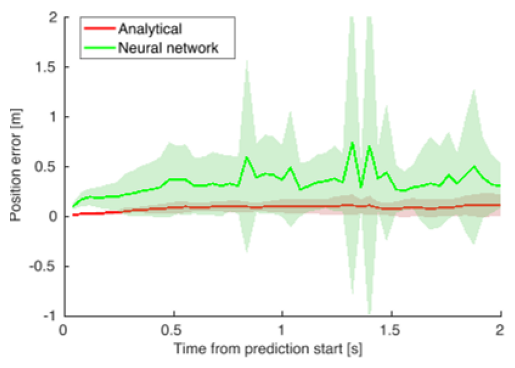

In [41]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from transformers import AutoTokenizer, AutoModelForImageCaptioning

# Load the fine-tuned vision encoder-decoder model
model_name = "/content/drive/MyDrive/Model/vt.pth"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForImageCaptioning.from_pretrained(model_name)

# Define image preprocessing pipeline
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load and preprocess the image
image_path = "/content/Images/2011.09068v1-Figure8-1.png"
image = Image.open(image_path).convert("RGB")
image = image_transform(image)
image = image.unsqueeze(0)  # Add batch dimension

# Generate caption
output = model.generate(image)
generated_caption = tokenizer.decode(output[0], skip_special_tokens=True)

# Visualize the image and generated caption
plt.imshow(image.squeeze(0).permute(1, 2, 0))
plt.axis("off")
plt.title("Generated Caption: " + generated_caption)
plt.show()

In [52]:
from nltk.translate.bleu_score import sentence_bleu

# Generated caption and reference captions
generated_caption = "the average evolution of the position error when predicting from different instants in a 40-minute dataset of free diabolo play . the error tends to be larger for dynamic motions ."
reference_captions = ["the average evolution of positional error when predicting from different instants in 50-minute dataset of free diabolock play . this error tends to be larger for the dynamic motions in the set ."]

# Tokenize the captions
generated_tokens = generated_caption.split()
reference_tokens = [ref.split() for ref in reference_captions]

# Compute the BLEU score
bleu_score = sentence_bleu(reference_tokens, generated_tokens)
print("BLEU score:", bleu_score)




BLEU score: 0.4111336169005197


In [54]:
import nltk

# Reference captions (list of lists)
reference_captions = ['the ','average',' evolution',' of ','positional',' error',' when',' predicting',' from',' different ','instants',' in ','50-minute',' dataset',' of',' free ','diabolock',' play ',' this',' error',' tends',' to',' be',' larger',' for ','the',' dynamic ','motions',' in',' the ','set']

# Candidate caption (list)
candidate_caption = ['the',' average',' evolution ','of ','the',' position',' error',' when',' predicting',' from',' different',' instants',' in ','a',' 40-minute',' dataset',' of',' free',' diabolo ','play ','the',' error',' tends',' to',' be ','larger ','for', 'dynamic' ,'motions']

# Calculate BLEU score
bleu_score = nltk.translate.bleu_score.sentence_bleu(reference_captions, candidate_caption, weights=(0.25, 0.25, 0.25, 0.25))

print("BLEU-4 Score:", bleu_score)


BLEU-4 Score: 0.4111336169005197
